
# Dark Theme Pizza (Percentiles)

* Author: [slothfulwave612](https://twitter.com/slothfulwave612)

* ``mplsoccer``, ``py_pizza`` module helps one to plot pizza charts in a few lines of code.

* The design idea is inspired by [Tom Worville](https://twitter.com/Worville), [Football Slices](https://twitter.com/FootballSlices) and [Soma Zero FC](https://twitter.com/somazerofc)

* We have re-written [Soumyajit Bose's](https://twitter.com/Soumyaj15209314)  pizza chart code to enable greater customisation.

Here we plot a pizza chart with a dark theme.


In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [7]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')

## Load Image
Load a cropped image of Frenkie de Jong.



In [8]:
URL = "https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/fdj_cropped.png"
fdj_cropped = Image.open(urlopen(URL))

## Dark Theme
Below is an example code for dark theme.



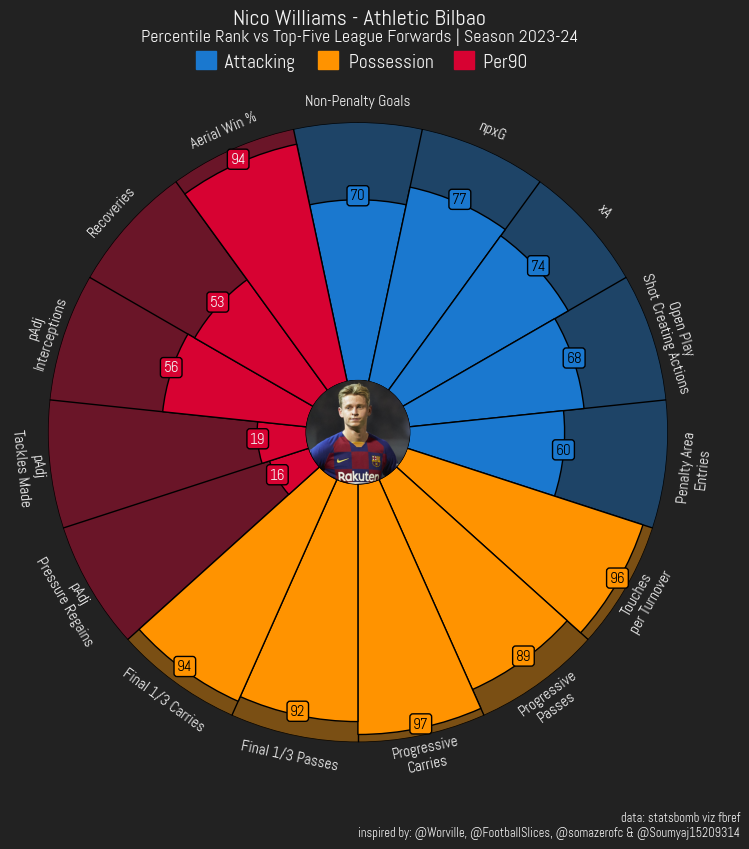

In [29]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "\nPenalty Area\nEntries", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 1/3 Passes", "Final 1/3 Carries", "pAdj\nPressure Regains",
          "pAdj\nTackles Made", "pAdj\nInterceptions", "Recoveries", "Aerial Win %"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [70, 77, 74, 68, 60, 96, 89, 97, 92, 94, 16, 19, 56, 53, 94]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Nico Williams - Athletic Bilbao", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Forwards | Season 2023-24",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, " Attacking            Possession           Per90", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()